# Using distance similarity metrics (Unsupervised Machine learning) to optimise pairwise similarities of Scientific journals 

**summary**: This project will help aid the International Society for knowledge organisation - TSKO - (Singapore Chapter) to better segment scientific journals that are most similar.
Trying to explore ML techniques that can perform better than conventional ways to index scientific journals in their respective category.
<br>
This is the first iteration of the research project to see how successful ML technqiues are against conventional methods. The results of this project will be presented to TSKO in a conference at around September/October in Singapore.


In [1]:
#Data wrangling package in Python 
import pandas as pd
import numpy as np
#Glob pythons filepath recognition 
import glob 
# Pythons package is the way in which it can interact with the operating system
import os
# natural language processing package 
import nltk 
import re
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer   
ps = PorterStemmer() 
porter = PorterStemmer()
lancaster=LancasterStemmer()

### collating all extracts into one dataframe
* Please note that the Lens ID column is the unique identifier for each document which are scientific papers.
    * Example Lens ID 
``` python
'116-509-832-503-46X'
```
* This is important if you need to refer to one document to another in terms of spot checking and validation

In [2]:
##### Concatenate the excel files together
print(glob.glob("/home/adam/*.txt"))
os.chdir("C:/Users/andym/Desktop/Datafancy/Journal_managementNP/01-Raw_data/all_data")
# get data file names
path =r'C:\Users\andym\Desktop\Datafancy\Journal_managementNP\01-Raw_data\all_data'
all_files = glob.glob(path + "/*.csv")

### set an empty list?
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['file_name'] = filename
    li.append(df)
    
frame = pd.concat(li, axis=0, ignore_index=True)
dframe = pd.DataFrame(data = frame)
dframe['Publication Year'] = dframe['Publication Year'].astype('int') 
dframetrim = dframe[dframe.Abstract.notnull()]
dframetrim.head()

[]


,Lens ID,Title,Date Published,Publication Year,Publication Type,Source Title,ISSNs,Publisher,Source Country,Author/s,...,Source URLs,External URL,PMID,DOI,Microsoft Academic ID,PMCID,Patent Citation Count,References,Scholarly Citation Count,file_name
621,000-251-444-646-256,Electronic media and visual knowledge,NaN,1993,journal article,Knowledge Organization,9437444,International Society for Knowledge Organization,Germany,Kim H. Veltman,...,http://dx.doi.org/10.5771/0943-7444-1993-1-47 ...,http://dx.doi.org/10.5771/0943-7444-1993-1-47,NaN,10.5771/0943-7444-1993-1-47,2.495233e+09,NaN,0,188-563-904-203-247,1,C:\Users\andym\Desktop\Datafancy\Journal_manag...
623,002-768-931-855-543,HYPERICONICS: Hypertext and the social constru...,NaN,1993,journal article,Knowledge Organization,9437444,International Society for Knowledge Organization,Germany,Gerhard Jan Nauta,...,http://dx.doi.org/10.5771/0943-7444-1993-1-35 ...,http://dx.doi.org/10.5771/0943-7444-1993-1-35,NaN,10.5771/0943-7444-1993-1-35,2.505692e+09,NaN,0,NaN,0,C:\Users\andym\Desktop\Datafancy\Journal_manag...
627,013-996-415-887-147,Terminological research in the former USSR,NaN,1993,journal article,Knowledge Organization,9437444,International Society for Knowledge Organization,Germany,Sergey V.Grinev,...,http://cat.inist.fr/?aModele=afficheN&cpsidt=3...,http://dx.doi.org/10.5771/0943-7444-1993-3-150,NaN,10.5771/0943-7444-1993-3-150,2.475052e+09,NaN,0,NaN,0,C:\Users\andym\Desktop\Datafancy\Journal_manag...
631,017-489-591-364-184,Seven fundamental questions for the science of...,1993-12-01,1993,journal article,Knowledge Organization,9437444,International Society for Knowledge Organization,Germany,Robert M. Losee,...,https://uncch.pure.elsevier.com/en/publication...,http://dx.doi.org/10.5771/0943-7444-1993-2-65,NaN,10.5771/0943-7444-1993-2-65,5.290351e+07,NaN,0,005-255-725-462-840; 010-656-047-738-040; 016-...,10,C:\Users\andym\Desktop\Datafancy\Journal_manag...
638,025-077-447-234-296,Subject authory control in a union catalogue: ...,NaN,1993,journal article,Knowledge Organization,9437444,International Society for Knowledge Organization,Germany,Maria Ines Lopes,...,http://dx.doi.org/10.5771/0943-7444-1993-3-133...,http://dx.doi.org/10.5771/0943-7444-1993-3-133,NaN,10.5771/0943-7444-1993-3-133,2.469551e+09,NaN,0,NaN,0,C:\Users\andym\Desktop\Datafancy\Journal_manag...


### Preprocessing the Abstract column of all the documents
1. Remove all special characters like ! , ? and , etc
2. Tokenise the entire string into individual elements in a list
3. Temove all stop words using the stopwords corpus from the nltk package
4. Stemming all words to its root word. For example , theory and theories to just theory and theory

In [3]:
from nltk.corpus import stopwords
englishstopwords = stopwords.words('english')

dframetrim['Abstract_trim_2'] = dframetrim['Abstract']

for i in range(len(dframetrim['Abstract'])):
    dframetrim['Abstract_trim_2'].values[i]  = re.sub('[^A-Za-z0-9]+', ' ', dframetrim['Abstract_trim_2'].values[i].lower()) ## Lower case and special characters removed
    dframetrim['Abstract_trim_2'].values[i]  = dframetrim['Abstract_trim_2'].values[i].split(' ') ## tokenise
##### I might need to look up lambda
dframetrim['Abstract_trim_2'] = dframetrim['Abstract_trim_2'].apply(lambda x: [item for item in x if item not in stopwords.words('english')]) ## Stopwords
dframetrim['Abstract_trim_2'] =  dframetrim['Abstract_trim_2'].apply(lambda x: [porter.stem(item) for item in x ]) ## Stemming 

C:\Users\andym\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\andym\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\andym\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

### Removing other useless words like 'use' or 'www'
* for spot checking individual words to be included into the word_remove_list
  1. you can create a distinct list of words with its respective count frequency using the counter function from the collections package
  2. Manually inspect each word ordered by highest count to include in the word_remove_list list

In [4]:
word_remove_list = ['knowledg','classif','inform','use','www','good','','organ'
                    ,'paper','subject','term','studi','develop','term','librari'
                    ,'differ','index','approach','work','base','scienc','field'
                    ,'user','structure','ko','www','present','ko','also','p',
                    'two','one','provid','author','need','tag','within','way','well','includ',
                    'part','three','may','2','e','ddc','1','3','4','5','6','7','8','9','10','li',
                    'would','non','de','four','ir','thu','frbr','737','g',
                    'etc','av','br','co','th','o','sg','nr','per','1087',
                    'six','j','via','miss','r','et','dan','bia','niac','sch','17525900'
                    'u','lcc','c','ii','la','n','dc','aat' ,'24','TRUE','keep','220','le','po','stw',
                    'kdc','oto','gsc','gsp','k','pt','dr','go','100','cc','il','nt','280','b','l','v',
                    '20','kr','sp','ave','se','12','0','23','33','157','iv','rd','am','mid','34','be','iii','fid'
                    ,'lc','met','20th' ,'ste','axi','dsi','axi','200','230','223','hlt','sur','du','mesh'
                    ,'lcsh','oclc','eu','atn','2nd','bc2','di','76','500','get','http','sdss','crg'
                    ,'esp','sab','lay','11','37','cs','urg','17525000','ot','fo','hn','em','ncft','48',
                    '40','168','dec','pc','fix','ccq','lrt','ic','fix','owe','120th','87','510','94','49',
                    '6n','mit','rev','int','32','136','144','cr','119','148','wall','120','ckm','cd','rom',
                    'ata','nest','sdoc','soli','istei','tct','shl','ana','asp','dk5','240','292','299','f','ég','222'
                    ,'229','59','pin','sen','twelv','bbk','14','28','180','192','cle','150','ec','np','ifla','ey','dea',
                    'cpcl','nl','601','178','215','iskoi','htm','i','ref','31','92','97','çmf','ibn','vo','inv','un','kop','cen','21st'
                    ,'659','ph','229','26','va','oc','ufpr','80060000','ena','od','fu','3d','dog','ear','vi','saa','vi','62',
                    'ed','43hing','kno','pubm','39','268','275','els','fac','nd','ek','oth','er','cep','ia','iti','38','114',
                    '122','35','lam','liu','ru','16','403','41','311','318','ga','eas','gri','tgn','cut','off','add','lrm','cm','ric','collat',
                    'stop','unlik','die','sdi','90','379','1a','1b','rda','riv','hj','pac','hoc','rid','rio','ssn','real',
                    'ccp','iht','edm','today','lie','point','bcc']

dframetrim['Abstract_trim_2'] = dframetrim['Abstract_trim_2'].apply(lambda x: [item for item in x if item not in word_remove_list]) 

C:\Users\andym\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Function to create the extract NLP features for the unsupervised machine learning project
The function creates multiple sets of individual words as columns by IDF , count(word count field), Cal_Term_Freq_TF and Binary_count thus creating around 13,000 fields!
<br>
This function creates multiple pivots of distinct words into columns by:
 1. Count: the number of times that word has appeared in that individual abstract
 2. Binary_count: Binary output of that word actually appearing in that document or not (1 = yes,0 = no)
 3. Cal_Term_Freq_TF: count number of times that word has appeared in that abstract divided by the total words in that abstract
 4. Cal_Inverse_Document_Freq_IDF: Log(total number of documents in that total dataset / number of times that word was mentioned in any abstract within that total dataset)

In [5]:
def word_count_df(testing_loop):

    from collections import Counter
    import numpy as np

    def getUniqueWords(allWords):
        uniqueWords = [] 
        for i in allWords:
            if not i in uniqueWords:
                uniqueWords.append(i)
        return uniqueWords

    testing_loop_long = testing_loop
    testing_loop_long['Abstract_trim_2_distinct'] = testing_loop_long['Abstract_trim_2']
    for id,i in enumerate(testing_loop_long['Abstract_trim_2']):
        testing_loop_long['Abstract_trim_2_distinct'].iloc[id] = getUniqueWords(i)
        
    testing_loop_long = testing_loop_long[testing_loop_long.astype(str)['Abstract_trim_2_distinct'] != '[]']
    testing_loop = testing_loop[testing_loop.astype(str)['Abstract_trim_2_distinct'] != '[]']    

    testing_loop['abstract_counts'] = [Counter(x).most_common() for x in testing_loop['Abstract_trim_2']]

    testing_loop = testing_loop[testing_loop.astype(str)['abstract_counts'] != '[]']

    testing_loop_long = testing_loop[['Lens ID','Abstract_trim_2_distinct','Abstract_trim_2']].explode('Abstract_trim_2_distinct')

    testing_loop_long['abstract_counts_unlist'] = [val for sublist in testing_loop['abstract_counts'] for val in sublist]

#pd.DataFrame(testing_loop['abstract_counts_unlist'])
#### Unzip the individual tuples and covert into seperate columns
#testing_loop_long['Word'] = testing_loop_long['Abstract_trim_2_distinct']
#testing_loop_long['Count'] = testing_loop_long['Abstract_trim_2_distinct']
    testing_loop_long['Word'], testing_loop_long['Count'] = zip(*testing_loop_long['abstract_counts_unlist'])
    testing_loop_long['Binary_count'] = 1

    testing_loop_long["Total_words_in_abstract"] = testing_loop_long['Abstract_trim_2']
    for id,i in enumerate(testing_loop_long['Abstract_trim_2']):
        testing_loop_long["Total_words_in_abstract"].iloc[id] = len(testing_loop_long['Abstract_trim_2'].iloc[id])
    testing_loop_long['Cal_Term_Freq_TF'] =  (testing_loop_long['Count']/testing_loop_long["Total_words_in_abstract"])
    
    testing_loop_long_Count = testing_loop_long[['Lens ID','Word','Count']].pivot_table(index = 'Lens ID',columns = 'Word' , values = 'Count').fillna(0).add_prefix('Count_')   
    testing_loop_long_Count = pd.DataFrame(testing_loop_long_Count.to_records())

    testing_loop_long_TF = testing_loop_long[['Lens ID','Word','Cal_Term_Freq_TF']].pivot_table(index = 'Lens ID',columns = 'Word' , values = 'Cal_Term_Freq_TF',aggfunc = np.sum).fillna(0).add_prefix('TF_')      
    testing_loop_long_TF = pd.DataFrame(testing_loop_long_TF.to_records()) 

    testing_loop_long_Binary = testing_loop_long[['Lens ID','Word','Binary_count']].pivot_table(index = 'Lens ID',columns = 'Word' , values = 'Binary_count').fillna(0).add_prefix('Binary_') 
    testing_loop_long_Binary = pd.DataFrame(testing_loop_long_Binary.to_records()) 

    testing_loop_long['abstract_concat_list'] = testing_loop_long['Abstract_trim_2']
    for i in range(len(testing_loop_long['Abstract_trim_2'])):
        testing_loop_long['abstract_concat_list'].values[i] = list(testing_loop['Abstract_trim_2'])
    
    testing_loop_long['dsad'] = testing_loop_long['abstract_concat_list']
    for id1,o in enumerate(testing_loop_long['abstract_concat_list']):
        for id2,i in enumerate(o):
            testing_loop_long['dsad'].iloc[id1][id2] = [i for i in testing_loop_long['abstract_concat_list'].iloc[id1][id2] if i == testing_loop_long['Word'].values[id1]] 

    for id,i in enumerate(testing_loop_long['dsad']):
        testing_loop_long['dsad'].values[id] = [x for x in testing_loop_long['dsad'].values[id] if x != []]        

    testing_loop_long['times_mentioned_in_abstracts'] = [len(x) for x in testing_loop_long['dsad']]   
    testing_loop_long['Total_number_abstracts'] = len(testing_loop["Abstract_trim_2"])       
    testing_loop_long['Cal_Inverse_Document_Freq_IDF'] = np.log10(testing_loop_long['Total_number_abstracts']/testing_loop_long['times_mentioned_in_abstracts'])

    testing_loop_long_IDF = testing_loop_long[['Lens ID','Word','Cal_Inverse_Document_Freq_IDF']].pivot_table(index = 'Lens ID',columns = 'Word' , values = 'Cal_Inverse_Document_Freq_IDF').fillna(0).add_prefix('IDF_')  
    testing_loop_long_IDF = pd.DataFrame(testing_loop_long_IDF.to_records()) 

    testing_loop_wide = testing_loop_long_IDF.set_index('Lens ID').join(testing_loop_long_TF.set_index('Lens ID')).join(testing_loop_long_Count.set_index('Lens ID')).join(testing_loop_long_Binary.set_index('Lens ID'))

    return testing_loop_wide


#### After applying the function for data feature engineering 
We have the following dataset below/
You can run the function by uncommenting the line in the code chunk  

```python 
test = word_count_df(testing_loop =  dframetrim)
```
However, this function is quite computational taxing and will read the csv file instead
<br>

The reason why I created it into a function is because I can do the computation on a small subset as shown below in the code chunk

```python 
testsmall = word_count_df(testing_loop =  dframetrim.iloc[0:2])
```


In [6]:
######## If you need to re-create the word_count_df
#testsmall = word_count_df(testing_loop =  dframetrim.iloc[0:2])
#test = word_count_df(testing_loop =  dframetrim)
#test.to_csv(r'C:\Users\andym\Desktop\Datafancy\Journal_managementNP\03-test_datasets\Final_pivot_dataset_abstract.csv')

Final_pivot_dataset = pd.read_csv(r"C:\Users\andym\Desktop\Datafancy\Journal_managementNP\03-test_datasets\Final_pivot_dataset_abstract.csv")
Final_pivot_dataset = Final_pivot_dataset.set_index("Lens ID")
Final_pivot_dataset.head()

,IDF_000,IDF_01,IDF_113,IDF_1232,IDF_1274,IDF_1294,IDF_1296,IDF_13,IDF_1316,IDF_1700,...,Binary_yellow,Binary_yet,Binary_yield,Binary_yoga,Binary_yogic,Binary_zation,Binary_zenon,Binary_zentralblatt,Binary_zone,Binary_zoolog
Lens ID,,,,,,,,,,,,,,,,,,,,,
000-189-988-224-76X,2.251638,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000-251-444-646-256,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001-254-322-670-872,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001-281-947-751-975,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001-542-585-753-06X,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.552668,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Using distance based similarity metrics to find optimal pairwise similarities of scientific journals (unsupervised machine learning)
* Datasets was randomly split between train (285 rows or 80% of total dataset) and test sets (72 rows or 20% of total dataset)
* Only selecting IDF columns for this analysis
* Using sklearn package to retrieve the libary of different distance measures
   1. Cosine similarity
   2. Hamming Distance
   3. Jaccard 
* Ended up using the cosine similarity metric since it's caculation is robust with a very sparse dataset (i.e a wide dataset/highly dimensional)

In [10]:
##Split data sets randomly from 80% to 20% and do a iterative loop to of comparing each 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Final_pivot_dataset_IDF = Final_pivot_dataset.loc[:, Final_pivot_dataset.columns.str.startswith("IDF_")]

from sklearn.model_selection import train_test_split
##### set seeds to control the randomness 
x_train ,x_test = train_test_split(Final_pivot_dataset_IDF,test_size=0.2,random_state  = 11) 
x_test

###########################################################################################
#################### COSINE SIMILARITY ####################################################
###########################################################################################

#### Needs spot checking
test_matrix_cosine = cosine_similarity(x_train,x_test)
test_matrix_cosine.shape

#pd.DataFrame(test_matrix_cosine).to_csv(r"C:\Users\andym\Desktop\Datafancy\Journal_managementNP\03-test_datasets\test_matrix.csv")
test_matrix_cosine_df = pd.DataFrame(test_matrix_cosine)
test_matrix_cosine_df = test_matrix_cosine_df.set_index(x_train.index)
test_matrix_cosine_df.columns = x_test.index
test_matrix_cosine_df.to_csv(r"C:\Users\andym\Desktop\Datafancy\Journal_managementNP\03-test_datasets\test_matrix_cosine.csv")

############################################################################################
#################### HAMMING DISTANCE ######################################################
############################################################################################

from scipy.spatial import distance

lst = [[] for _ in range(len(x_train))]

for i in range(len(x_train)):
    for j in range(len(x_test)):
        lst[i].append(distance.hamming(x_train[i:i+1],x_test[j:j+1]))                         
            
lstdf = pd.DataFrame(lst)    
test_matrix_hamming_df = lstdf.set_index(x_train.index)
test_matrix_hamming_df.columns = x_test.index
test_matrix_hamming_df.to_csv(r"C:\Users\andym\Desktop\Datafancy\Journal_managementNP\03-test_datasets\test_matrix_hamming.csv")

############################################################################################
#################### JACCARD DISTANCE ######################################################
############################################################################################
from scipy.spatial import distance

lst = [[] for _ in range(len(x_train))]

for i in range(len(x_train)):
    for j in range(len(x_test)):
        lst[i].append(distance.jaccard(x_train[i:i+1],x_test[j:j+1]))                         
            
lstdf = pd.DataFrame(lst)    
test_matrix_jaccard_df = lstdf.set_index(x_train.index)
test_matrix_jaccard_df.columns = x_test.index
test_matrix_jaccard_df.to_csv(r"C:\Users\andym\Desktop\Datafancy\Journal_managementNP\03-test_datasets\test_matrix_jaccard.csv")

#################################################################################################
test_matrix_cosine_df.head()

Lens ID,097-421-372-053-520,116-509-832-503-46X,043-454-317-567-459,036-149-448-029-082,062-055-064-561-85X,061-018-838-320-648,179-132-294-510-213,078-881-949-441-033,116-085-787-369-516,046-376-269-492-795,...,098-828-423-432-071,067-137-702-908-40X,106-561-636-619-444,099-563-150-734-423,012-652-438-359-587,188-192-965-023-127,111-093-646-386-599,144-109-666-243-086,121-066-553-719-090,092-507-541-687-774
Lens ID,,,,,,,,,,,,,,,,,,,,,
122-703-378-850-053,0.046075,0.013647,0.012873,0.051560,0.054563,0.050737,0.062397,0.049819,0.032773,0.092991,...,0.020608,0.055795,0.051258,0.065044,0.003861,0.035662,0.00000,0.049747,0.018606,0.020763
024-276-265-590-973,0.040656,0.113683,0.012610,0.004603,0.014896,0.033789,0.057319,0.009548,0.091528,0.012198,...,0.018355,0.051186,0.015136,0.031840,0.024567,0.052523,0.00000,0.016853,0.025999,0.024493
191-349-254-093-883,0.035778,0.040962,0.034939,0.017814,0.066108,0.031187,0.076319,0.000000,0.033168,0.039808,...,0.024243,0.050914,0.035137,0.056583,0.005999,0.040904,0.00000,0.039702,0.026393,0.035599
185-129-272-793-400,0.000000,0.035100,0.000000,0.030327,0.036516,0.029594,0.000000,0.000000,0.012585,0.011455,...,0.000000,0.056704,0.011957,0.021959,0.000000,0.044913,0.01392,0.012130,0.000000,0.008138
120-767-088-360-769,0.072148,0.077910,0.000000,0.021129,0.031473,0.022061,0.007320,0.000000,0.081118,0.013313,...,0.023231,0.001012,0.041261,0.027389,0.056537,0.039887,0.00000,0.030539,0.000000,0.027998


## Spot checks and validation of the above similarity matrices 

In [9]:
###### testing the Cosine similarity matrixs here to see if it's correct
###### Cosine matrix is accurate and was checked on (18/03/2021 23:26)
cosine_similarity(x_test[x_test.index =='116-509-832-503-46X'],x_train[x_train.index =='122-703-378-850-053'])
cosine_similarity(x_test[x_test.index =='043-454-317-567-459'],x_train[x_train.index =='089-926-127-972-615'])
cosine_similarity(x_test[x_test.index =='116-509-832-503-46X'],x_train[x_train.index =='191-349-254-093-883'])

cosine_similarity(x_test[x_test.index =='118-102-398-817-762'],x_train[x_train.index =='122-703-378-850-053'])
cosine_similarity(x_test[x_test.index =='118-102-398-817-762'],x_train[x_train.index =='024-276-265-590-973'])
cosine_similarity(x_test[x_test.index =='025-320-084-599-970'],x_train[x_train.index =='191-349-254-093-883'])

cosine_similarity(x_test[x_test.index =='062-055-064-561-85X'],x_train[x_train.index =='036-074-742-305-080'])

########################################################################################################################
########################################################################################################################
##### Check email for more information
#### Row 1
cosine_similarity(x_test[x_test.index =='097-421-372-053-520'],x_train[x_train.index =='078-470-148-980-604'])
## bills correct row 1 match
cosine_similarity(x_test[x_test.index =='116-509-832-503-46X'],x_train[x_train.index =='078-470-148-980-604'])
cosine_similarity(x_test[x_test.index =='116-509-832-503-46X'],x_train[x_train.index =='024-276-265-590-973'])

#### Row 5
cosine_similarity(x_test[x_test.index =='062-055-064-561-85X'],x_train[x_train.index =='064-751-648-054-001'])
## bills correct row 5 match 
cosine_similarity(x_test[x_test.index =='097-421-372-053-520'],x_train[x_train.index =='064-751-648-054-001'])

###############################
# My script is doing the right thing
# It's just the cosine similarity is deeming that it is by far the most optimal cosine similarity 
# reccommendations is to maybe clean up the remove word list and add new columns to understand whether that would improve the performance

####### test if the jaccard and Hamming distance is doing the right thing
####### it has been check for its accuracy (18/03/2021 23:38)
test_matrix_jaccard_df.loc['122-703-378-850-053','116-509-832-503-46X'] == distance.jaccard(x_test[x_test.index =='116-509-832-503-46X'],x_train[x_train.index =='122-703-378-850-053'])
test_matrix_jaccard_df.loc['089-926-127-972-615','043-454-317-567-459'] == distance.jaccard(x_test[x_test.index =='043-454-317-567-459'],x_train[x_train.index =='089-926-127-972-615'])
test_matrix_jaccard_df.loc['191-349-254-093-883','116-509-832-503-46X'] == distance.jaccard(x_test[x_test.index =='116-509-832-503-46X'],x_train[x_train.index =='191-349-254-093-883'])

test_matrix_jaccard_df.loc['122-703-378-850-053','118-102-398-817-762'] == distance.jaccard(x_test[x_test.index =='118-102-398-817-762'],x_train[x_train.index =='122-703-378-850-053'])
test_matrix_jaccard_df.loc['024-276-265-590-973','118-102-398-817-762'] == distance.jaccard(x_test[x_test.index =='118-102-398-817-762'],x_train[x_train.index =='024-276-265-590-973'])
test_matrix_jaccard_df.loc['191-349-254-093-883','118-102-398-817-762'] == distance.jaccard(x_test[x_test.index =='118-102-398-817-762'],x_train[x_train.index =='191-349-254-093-883'])

######## Testing the Hamming distance
####### it has been check for its accuracy (18/03/2021 23:38)
test_matrix_hamming_df.loc['122-703-378-850-053','116-509-832-503-46X'] == distance.hamming(x_test[x_test.index =='116-509-832-503-46X'],x_train[x_train.index =='122-703-378-850-053'])
test_matrix_hamming_df.loc['122-703-378-850-053','043-454-317-567-459'] == distance.hamming(x_test[x_test.index =='043-454-317-567-459'],x_train[x_train.index =='089-926-127-972-615'])
test_matrix_hamming_df.loc['122-703-378-850-053','116-509-832-503-46X'] == distance.hamming(x_test[x_test.index =='116-509-832-503-46X'],x_train[x_train.index =='191-349-254-093-883'])

test_matrix_hamming_df.loc['122-703-378-850-053','118-102-398-817-762'] == distance.hamming(x_test[x_test.index =='118-102-398-817-762'],x_train[x_train.index =='122-703-378-850-053'])
test_matrix_hamming_df.loc['024-276-265-590-973','118-102-398-817-762'] == distance.hamming(x_test[x_test.index =='118-102-398-817-762'],x_train[x_train.index =='024-276-265-590-973'])
test_matrix_hamming_df.loc['191-349-254-093-883','118-102-398-817-762'] == distance.hamming(x_test[x_test.index =='118-102-398-817-762'],x_train[x_train.index =='191-349-254-093-883'])

######################################################################################################
################# The validation of the COsine, Jaccard and Hamming matrices is correct ##############


0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
2 50
2 51
2 52
2 53
2 54
2 55
2 56
2 57
2 58
2 59
2 60
2 61


NameError: name 'test_matrix_jaccard_sample' is not defined

## Development code

In [ ]:
#### Test matrix development 
#### Jaccard 
x_train[0:1]
x_train[1:2]
x_train[2:3]
x_train[3:4]

x_train.iloc[1]

x_train[71:72]
for i in range(len(x_train)):
    for j in range(len(x_test)):
        print(i,j)

lst2 = []
for i in range(len(x_test)):
    lst2.append(i)

lst = [[] for _ in range(len(x_train))]
test_matrix_jaccard =[lst2 for i in lst]

test_matrix_jaccard2 = test_matrix_jaccard

for i in range(len(x_train)):
    for j in range(len(x_test)):
        test_matrix_jaccard2[i][j] = distance.jaccard(x_train[i:i+1],x_test[j:j+1]) 

len(test_matrix_jaccard)
len(test_matrix_jaccard[0])  

x_test_sample = x_test[0:5]
x_train_saple = x_train[0:7]

lst2 = []
for i in range(len(x_test_sample)):
    lst2.append(i)

lst = [] 
#= [[] for _ in range(len(x_train_saple))]
#test_matrix_jaccard_sample =[lst2 for i in lst]
lst = [[] for _ in range(len(x_train_saple))]

for i in range(len(x_train)):
    for j in range(len(x_test)):
        test_matrix_jaccard_sample[i][j] = distance.jaccard(x_train_saple[i:i+1],x_test_sample[j:j+1]) 
        lst.append(test_matrix_jaccard_sample[i])

for i in range(len(x_train_saple)):
    for j in range(len(x_test_sample)):
        lst[i].append(distance.jaccard(x_train_saple[i:i+1],x_test_sample[j:j+1]))        

lstdf = pd.DataFrame(lst)    
test_matrix_jaccard_df_sample = lstdf.set_index(x_train_saple.index)
test_matrix_jaccard_df_sample.columns = x_test_sample.index
test_matrix_jaccard_sample

### might need a smaller subset to understand this abit better 
#test_matrix_jaccard[0][0]
#test_matrix_jaccard[0][1] = distance.jaccard(x_train[0:1],x_test[1:2])
#test_matrix_jaccard[1]

### Spots check below to see if the Cosine similarity matrix calculations are correct

In [11]:
###### spot check each Similarity matrix
x_train.columns
x_test.columns
x_train.index
#103-364-820-610-122
#129-504-756-103-235
x_test.index
#000-251-444-646-256
#114-672-389-593-030

###### Cosine Similarity test 
test_matrix_cosine_df
cosine_similarity
cosine_similarity(x_train[x_train.index =='122-703-378-850-053'],x_test[x_test.index =='116-509-832-503-46X'])
#cosine_similarity(x_train[x_train.index =='129-504-756-103-235'],x_test[x_test.index =='166-898-814-966-01X'])
#cosine_similarity(x_train[x_train.index =='129-504-756-103-235'],x_test[x_test.index =='166-898-814-966-01X'])
#cosine_similarity(x_train[x_train.index =='048-107-503-236-974'],x_test[x_test.index =='001-281-947-751-975'])

array([[0.01364743]])

### Spots check below to see if the JAccard similarity matrix calculations are correct

In [ ]:
### the matrix is not making much sense

test_matrix_cosine_df
distance.jaccard(x_test[x_test.index =='116-509-832-503-46X'],x_train[x_train.index =='122-703-378-850-053'])
distance.jaccard(x_test[x_test.index =='116-509-832-503-46X'],x_train[x_train.index =='122-703-378-850-053'])


In [ ]:
### the matrix is not making much sense

test_matrix_hamming_df
distance.hamming(x_test[x_test.index =='116-509-832-503-46X'],x_train[x_train.index =='122-703-378-850-053'])
distance.hamming(x_test[x_test.index =='116-509-832-503-46X'],x_train[x_train.index =='024-276-265-590-973'])

### Creating a matrix that collapses the  similarity matrices with highest pairwise similarity score
* For each column it will find the document row with the highest simialrity score 
* collapsing to a new matrix by rank (1 being the highest similarity score for that pairwise) to 73 rows to 73 columns (column 1 and row 1 being the Lens ID value)
* 72 best pairwise match

In [83]:
#### Trying to find the the maximum simialrity by the test columns
#### Using windows analytics functions to retrieve the pair that gives the maximum cosine similarity
#### For filtering rows and columns more effectively
####https://towardsdatascience.com/effective-data-filtering-in-pandas-using-loc-40eb815455b6
#### Will be using windows analytics function and a for loop to get a rank of highest similarity 
#### Will need to do a full loop 
import numpy as np
rank_matrix_cosine_df = pd.DataFrame()
test_matrix_cosine_df['Lens ID'] = test_matrix_cosine_df.index
rank_matrix_cosine_df['Lens ID'] = test_matrix_cosine_df.index
test_columns = test_matrix_cosine_df.columns[test_matrix_cosine_df.columns != 'Lens ID']

##########################################################################################
#for cols in test_columns: 
#    rank_matrix_cosine_df = pd.DataFrame(test_matrix_cosine_df[test_columns].rank(method = 'first', ascending = False))

#### The list comprehension way!! Probs not apropriate 
rank_matrix_cosine_df = [pd.DataFrame(test_matrix_cosine_df[test_columns].rank(method = 'first', ascending = False)) for i in test_columns][1] 
#rank_matrix_cosine_df.columns = 'Rank_' + rank_matrix_cosine_df.columns.values

##### get pairwise with highest similarity score
##### 1 is for best pairwise match based on similarity score or otherwise 0

##### Cosine similarity rank matrix
lst = []
rank_cols = rank_matrix_cosine_df.columns

rank_matrix_cosine_df['Lens ID'] = test_matrix_cosine_df.index

for cols in rank_cols:
    lst.append(rank_matrix_cosine_df[['Lens ID',cols]].loc[rank_matrix_cosine_df[cols] == 1])
    
rank_matrix_cosine_df_final = pd.concat(lst).fillna(0)
rank_matrix_cosine_df_final.to_csv(r"C:\Users\andym\Desktop\Datafancy\Journal_managementNP\03-test_datasets\rank_matrix_cosine_df_final.csv")

#########################################################################
#################### hamming 
import numpy as np
rank_matrix_hamming_df = pd.DataFrame()
test_matrix_hamming_df['Lens ID'] = test_matrix_hamming_df.index
rank_matrix_hamming_df['Lens ID'] = test_matrix_hamming_df.index
test_columns = test_matrix_hamming_df.columns[test_matrix_hamming_df.columns != 'Lens ID']

##########################################################################################
#for cols in test_columns: 
#    rank_matrix_cosine_df = pd.DataFrame(test_matrix_cosine_df[test_columns].rank(method = 'first', ascending = False))
#### The list comprehension way!! Probs not apropriate 
rank_matrix_hamming_df = [pd.DataFrame(test_matrix_hamming_df[test_columns].rank(method = 'first', ascending = False)) for i in test_columns][1] 
#rank_matrix_cosine_df.columns = 'Rank_' + rank_matrix_cosine_df.columns.values

##### get pairwise with highest similarity score
##### 1 is for best pairwise match based on similarity score or otherwise 0

##### Cosine similarity rank matrix
lst = []
rank_cols = rank_matrix_hamming_df.columns

rank_matrix_hamming_df['Lens ID'] = test_matrix_hamming_df.index

for cols in rank_cols:
    lst.append(rank_matrix_hamming_df[['Lens ID',cols]].loc[rank_matrix_hamming_df[cols] == 1])

rank_matrix_hamming_df_final = pd.concat(lst).fillna(0)

rank_matrix_hamming_df.to_csv(r"C:\Users\andym\Desktop\Datafancy\Journal_managementNP\03-test_datasets\rank_matrix_hamming_df.csv")

########################################################
######################### Hamming ######################

rank_matrix_hamming_df = pd.DataFrame()
rank_matrix_hamming_df['Lens ID'] = test_matrix_hamming_df.index
rank_matrix_hamming_df.index = test_matrix_hamming_df.index
test_columns = test_matrix_hamming_df.columns[test_matrix_hamming_df.columns != 'Lens ID']

##### Hamming similarity rank matrix
#### The list comprehension way!! Probs not apropriate 
rank_matrix_hamming_df = [pd.DataFrame(test_matrix_hamming_df[test_columns].rank(method = 'first', ascending = False)) for i in test_columns][1] 

lst = []
rank_cols = test_matrix_hamming_df.columns

rank_matrix_hamming_df['Lens ID'] = test_matrix_hamming_df.index

for cols in rank_cols:
    lst.append(rank_matrix_hamming_df[['Lens ID',cols]].loc[rank_matrix_hamming_df[cols] == 1])

for i in range(len(lst)):
    lst[i]['new_index'] = str(i) + "hello"
    lst[i].set_index(['new_index'], inplace = True)     

lst2 = []
for id,i in enumerate(lst):
    if not i.empty:
        lst2.append(i)
    else:
        pass   
pd.concat(lst2)      

rank_matrix_hamming_df = pd.concat(lst2).fillna(0)
rank_matrix_hamming_df.to_csv(r"C:\Users\andym\Desktop\Datafancy\Journal_managementNP\03-test_datasets\rank_matrix_hamming_df_final.csv")


########################################################
######################### Jaccard ######################

rank_matrix_jaccard_df = pd.DataFrame()
rank_matrix_jaccard_df['Lens ID'] = test_matrix_jaccard_df.index
rank_matrix_jaccard_df.index = test_matrix_jaccard_df.index
test_columns = test_matrix_jaccard_df.columns[test_matrix_jaccard_df.columns != 'Lens ID']

##### Hamming similarity rank matrix
#### The list comprehension way!! Probs not apropriate 
rank_matrix_jaccard_df = [pd.DataFrame(test_matrix_jaccard_df[test_columns].rank(method = 'first', ascending = False)) for i in test_columns][1] 

lst = []
rank_cols = test_matrix_jaccard_df.columns

rank_matrix_jaccard_df['Lens ID'] = test_matrix_jaccard_df.index

for cols in rank_cols:
    lst.append(rank_matrix_jaccard_df[['Lens ID',cols]].loc[rank_matrix_jaccard_df[cols] == 1])

for i in range(len(lst)):
    lst[i]['new_index'] = str(i) + "hello"
    lst[i].set_index(['new_index'], inplace = True)     

lst2 = []
for id,i in enumerate(lst):
    if not i.empty:
        lst2.append(i)
    else:
        pass   
pd.concat(lst2)      


rank_matrix_jaccard_df = pd.concat(lst2).fillna(0)
rank_matrix_jaccard_df.to_csv(r"C:\Users\andym\Desktop\Datafancy\Journal_managementNP\03-test_datasets\rank_matrix_Jaccard_df_final.csv")

rank_matrix_jaccard_df.head()

###### make a note that this has been checked

Lens ID,Lens ID,097-421-372-053-520,116-509-832-503-46X,043-454-317-567-459,036-149-448-029-082,062-055-064-561-85X,061-018-838-320-648,179-132-294-510-213,078-881-949-441-033,116-085-787-369-516,...,098-828-423-432-071,067-137-702-908-40X,106-561-636-619-444,099-563-150-734-423,012-652-438-359-587,188-192-965-023-127,111-093-646-386-599,144-109-666-243-086,121-066-553-719-090,092-507-541-687-774
new_index,,,,,,,,,,,,,,,,,,,,,
0hello,185-129-272-793-400,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1hello,160-606-850-771-257,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2hello,185-129-272-793-400,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3hello,076-882-748-116-316,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4hello,012-309-807-113-075,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Spot check the Rank matrices 
* spot checked the Cosine , Jaccard and Hamming similarity rank matrices (checked on 19/03/2021 12:51) 
* notes: when there is a duplicate rank of 1 , the algorithm will take the first document row with a rank of 1 it will discards the other documents with a rank of one and performs the optimal pairwise similarity 
* please see rank_matrix_jaccard_df_final for more information

### Trying to pivot data for a row for row like measure for spot checking abstract
* This document will allow us to spot check each individual abstract to see if the pairwise similarity is accurate  
* To validate the classification of the different optimal pairs , it'll be voted by each spot checker a yes or no if it matches or not
* each journal check csv file has three columns; Dickson, Andy and Bill. These columns are for each individual spot checker to vote yes or no for each row of pairwise abstracts

In [22]:
##### Import the Journal_Dataframe
dataframe_journal = pd.read_csv(r"C:\Users\andym\Desktop\Datafancy\Journal_managementNP\04-final_datatsets\Dataframe_journal.csv")
abstract_df = dataframe_journal[['Lens ID','Abstract']]

#######################################################################################
########################## Cosine Similarity #########################################

cosine_train_column = pd.DataFrame(rank_matrix_cosine_df_final['Lens ID'])
cosine_train_column = cosine_train_column.drop(columns = ['Lens ID'])

#cosine_train_column['index'] = cosine_train_column.index
#cosine_train_column.reset_index
cosine_train_column_abs = cosine_train_column.merge(abstract_df,on = 'Lens ID', how = 'left',suffixes = ('Train_','Train_'))
cosine_train_column_abs['index'] = cosine_train_column_abs.index

cosine_test_column  = pd.DataFrame(rank_matrix_cosine_df_final.columns[rank_matrix_cosine_df_final.columns != 'Lens ID'])
cosine_test_column['index'] = cosine_test_column.index
cosine_test_column_abs = cosine_test_column.merge(abstract_df,left_on = 'Lens ID', right_on = 'Lens ID',suffixes = ('Test_','Test_'))

cosine_journal_check = cosine_train_column_abs.merge(cosine_test_column_abs,left_on ='index',right_on = 'index' , suffixes=('_Train', '_Test'))

### Individual voting columns
cosine_journal_check['Dickson'],cosine_journal_check['Andy'],cosine_journal_check['Bill'] = '','',''

cosine_journal_check.to_csv(r"C:\Users\andym\Desktop\Datafancy\Journal_managementNP\04-final_datatsets\cosine_journal_check_df_final.csv")
#######################################################################################
########################## Hamming Similarity #########################################

hamming_train_column = pd.DataFrame(rank_matrix_hamming_df['Lens ID']).reset_index()
hamming_train_column['index'] = hamming_train_column.index
hamming_train_column_abs = hamming_train_column.merge(abstract_df,on = 'Lens ID', how = 'left',suffixes = ('Train_','Train_'))

hamming_test_column  = pd.DataFrame(rank_matrix_hamming_df.columns[rank_matrix_hamming_df.columns != 'Lens ID'])
hamming_test_column['index'] = hamming_test_column.index
hamming_test_column_abs = hamming_test_column.merge(abstract_df,on = 'Lens ID', how = 'left',suffixes = ('Test_','Test_'))


hamming_journal_check['Dickson'],hamming_journal_check['Andy'],hamming_journal_check['Bill'] = '','',''
hamming_journal_check = hamming_train_column_abs.merge(hamming_test_column_abs,on = 'index', how = 'left', suffixes=('_Train', '_Test'))

hamming_journal_check.to_csv(r"C:\Users\andym\Desktop\Datafancy\Journal_managementNP\04-final_datatsets\hamming_journal_check_df_final.csv")
#######################################################################################
########################## Jaccard Similarity #########################################

jaccard_train_column = pd.DataFrame(rank_matrix_jaccard_df['Lens ID']).reset_index()
jaccard_train_column['index'] = jaccard_train_column.index
jaccard_train_column_abs = jaccard_train_column.merge(abstract_df,on = 'Lens ID', how = 'left',suffixes = ('Train_','Train_'))

jaccard_test_column  = pd.DataFrame(rank_matrix_jaccard_df.columns[rank_matrix_jaccard_df.columns != 'Lens ID'])
jaccard_test_column['index'] = jaccard_test_column.index
jaccard_test_column_abs = jaccard_test_column.merge(abstract_df,on = 'Lens ID', how = 'left',suffixes = ('Test_','Test_'))


jaccard_journal_check['Dickson'],jaccard_journal_check['Andy'],jaccard_journal_check['Bill'] = '','',''
jaccard_journal_check = jaccard_train_column_abs.merge(jaccard_test_column_abs,on = 'index', how = 'left', suffixes=('_Train', '_Test'))

jaccard_journal_check.to_csv(r"C:\Users\andym\Desktop\Datafancy\Journal_managementNP\04-final_datatsets\jaccard_journal_check_df_final.csv")
################################################################################################################################
################################### Cosine spot check outputs ##################################################################

cosine_journal_check.head()

,Lens ID_Train,Abstract_Train,index,Lens ID_Test,Abstract_Test,Dickson,Andy,Bill
0,078-470-148-980-604,Insight into the depth and breadth of knowledg...,0,097-421-372-053-520,This paper discusses some problems encountered...,,,
1,024-276-265-590-973,General linguistic and specific semantic probl...,1,116-509-832-503-46X,The paper addresses the ways in which computer...,,,
2,056-843-928-028-56X,"In this paper, I point to the importance of an...",2,043-454-317-567-459,This article examines the main objective and s...,,,
3,036-074-742-305-080,An increasing amount of images are being uploa...,3,036-149-448-029-082,The Indexing Branch of the National Agricultur...,,,
4,064-751-648-054-001,The necessity and value of models shaped in th...,4,062-055-064-561-85X,The internet in its Web 2.0 version has given ...,,,


## Spot Check Journal_check files 
* spot checked the Cosine_journal_check (checked on 19/03/2021 14:39) 
* spot checked the Hamming_journal_Check (checked on 19/03/2021 15:30)
* spot checked the Jaccard_journal_check (checked on 19/03/2021 15:36)

### Heatmap functions below

In [91]:
#### This might be important to present the data as a heatmap
############# A web reference to building a heatmap for this cosine similarity matrix
###https://blog.quantinsti.com/creating-heatmap-using-python-seaborn/
import seaborn as sb
import matplotlib.pyplot as plt
test_matrix_cosine_df

#sb.heatmap(data)
#np.array(test_matrix_cosine_df)[1]
Lens_ID = test_matrix_cosine_df['Lens ID']
np_df_matrix = test_matrix_cosine_df
np_df_matrix['Lens ID']
np_df_matrix =np_df_matrix.drop(columns = ['Lens ID'])
#sb.heatmap(np_df_matrix.to_numpy())
#plt.show()
###### This heatmap is too big 
#ax = plt.subplots(figsize=(16,20)) 

#sb.heatmap(np_df_matrix.to_numpy()[0:30],ax=ax)
#####

def heatplot_func(partitions = 10,part = 0):
    partitions = 10
    lstty = []
    for i in range(partitions):
        lstty.append(285/partitions)
#for id,i in enumerate(lstty):
    
    indexing2 = np.round(np.cumsum(lstty),0) 
    indexing1 = np.round(np.cumsum(lstty) - (285/partitions))   

    ax = plt.subplots(figsize=(17,20))     
    ax = sb.heatmap(np_df_matrix.to_numpy()[int(indexing1[part]):int(indexing2[part])], yticklabels=Lens_ID[int(indexing1[part]):int(indexing2[part])] ,xticklabels = test_matrix_cosine_df.columns[test_matrix_cosine_df.columns != 'Lens ID'])

    return ax

### Heatmap of the pairwise similarity score for train rows of documents (Based on Cosine Similarity Scores)
* The function below only visualises a portion of the train set as visualising all 285 rows too big!
* x Axis represents the test set documents (72 documents)
* y Axis represents the small subset of train set documents (28 rows at a time depending on what you set the partition argument in the heatplot_func below) 
* this function can be used again to visualise the next 9 partitions of the data by the 72 columns (represented in the X axis in the heat map)

<AxesSubplot:>

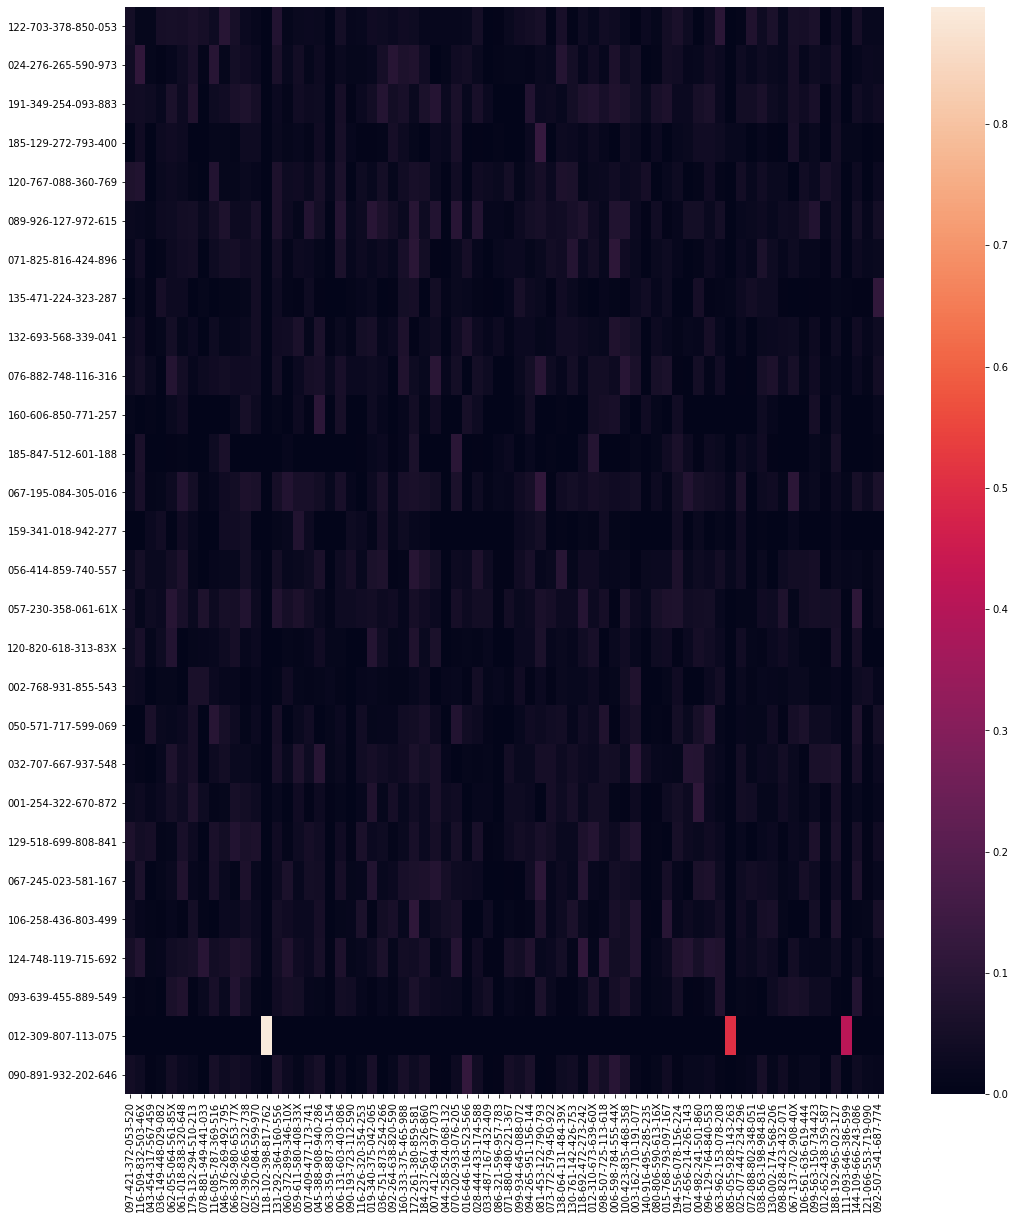

In [92]:
heatplot_func(partitions = 10,part = 0)

#### Data validation
#len(np_df_matrix.to_numpy()[1])
#len(np_df_matrix.to_numpy())
#Lens_ID[26]
#len(np_df_matrix.to_numpy()[0:int(np.round(285/10,0))])
#np_df_matrix.to_numpy()[26]
#cosine_similarity(x_train[x_train.index =='012-309-807-113-075'],x_test[x_test.index =='118-102-398-817-762'])